# MCMC from scratch

A simple example of Markov Chain Monte Carlo (MCMC) for sampling from the posterior distribution - 

adapted from: https://towardsdatascience.com/introduction-to-mcmc-1c8e3ea88cc9

In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Define Metropolis sampling procedure

In [54]:
def metropolis(pi, dims, n_samples, burn_in=0.1, var=1):
    # start with random initial position
    theta_ = np.random.randn(dims)*var
    samples = []
    # sampling loop
    while len(samples) < n_samples:
        theta = theta_ + np.random.randn(dims)*var
        
        ratio = pi(theta)/pi(theta_)
        if np.random.rand(1) < ratio:
            sample = theta
            theta_ = theta
            samples.append(sample)
        else:
            sample = theta_
            samples.append(sample)

    samples = np.array(samples)
    return samples # [int(samples*burn_in):,:]

### Example: multimodal Gaussian model

In [20]:
from scipy.stats import multivariate_normal
def make_pdf(mean1, mean2, cov1, cov2):
    pdf1 = multivariate_normal(mean1, cov1)
    pdf2 = multivariate_normal(mean2, cov2)
    def pdf(x):
        return pdf1.pdf(x) + pdf2.pdf(x)
    return pdf


In [16]:
mean1 = [3, 3]
mean2 = [-1, -1]
cov1 = np.array([[1,0.5],[0.5,1]], dtype=float)
cov2 = np.array([[1,-0.3],[-0.3,1]], dtype=float)
pdf1 = multivariate_normal(mean1, cov1)
pdf2 = multivariate_normal(mean2, cov2)

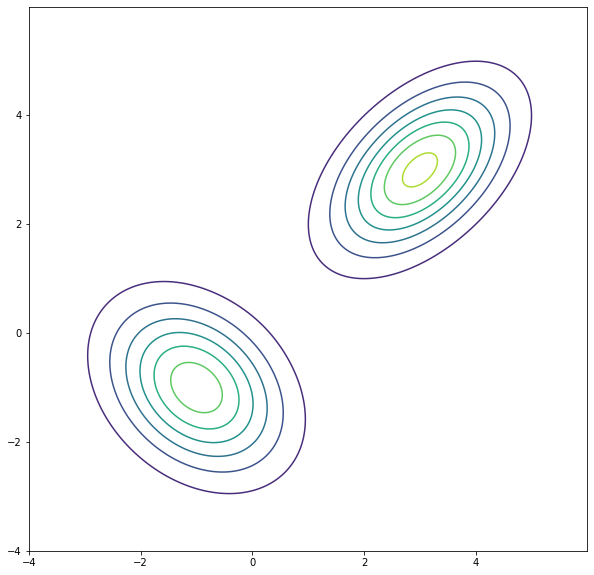

In [49]:
plt.figure(figsize=(10,10))
x, y = np.mgrid[-4:6:.01, -4:6:.01]
pos = np.dstack((x, y))
plt.contour(x, y, pdf1.pdf(pos) + pdf2.pdf(pos))
plt.savefig("multigauss.png")

In [18]:
pdf = make_pdf(mean1, mean2, cov1, cov2)

### Perform sampling

In [43]:
samples = metropolis(pdf, 2, 10_000, 0.1, 1)

In [62]:
def plot_samples(s_plot=1000):
    plt.figure(figsize=(10,10))
    plt.contourf(x, y, pdf1.pdf(pos) + pdf2.pdf(pos), 10, cmap='gray_r', alpha=0.4) #, linewidth=0)
    plt.scatter(samples[:s_plot,0], samples[:s_plot,1], s=1.5, c='k')
    plt.plot(samples[:s_plot,0], samples[:s_plot,1], lw=1, alpha=0.5)
    plt.xlim([-4,6])
    plt.ylim([-4,6])
    # plt.savefig("multigauss_sampling.png")

In [65]:
s_plot = 1000 # number of samples to plot from beginning of trace 

# plot_samples(s_plot)

What happens, if we increase the proposal step size?

In [64]:

interact(plot_samples, s_plot=widgets.IntSlider(min=0, max=5000, step=100, value=0));

interactive(children=(IntSlider(value=0, description='s_plot', max=5000, step=100), Output()), _dom_classes=('…

### Investigate traces to gain insight

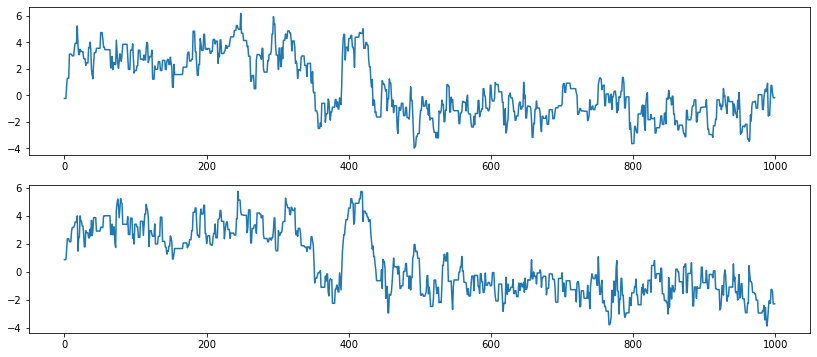

In [45]:
s_plot_max = 1000
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(samples[:s_plot_max,0])
ax2.plot(samples[:s_plot_max,1])

### Estimate probability density from samples

In [10]:
from scipy.stats import gaussian_kde

In [11]:
X, Y = np.mgrid[-4:6:.1, -4:6:.1]
positions = np.vstack([X.ravel(), Y.ravel()])

In [12]:
kernel = gaussian_kde(samples[:2000,:].T)

In [13]:
Z = np.reshape(kernel(positions).T, X.shape)

In [66]:
def plot_samples_and_density(s_plot=1000):
    plt.figure(figsize=(10,10))
    kernel = gaussian_kde(samples[:s_plot,:].T)
    Z = np.reshape(kernel(positions).T, X.shape)
    plt.contourf(x, y, pdf1.pdf(pos) + pdf2.pdf(pos), 10, cmap='gray_r', alpha=0.4) #, linewidth=0)
    plt.contour(X, Y, Z, 20, cmap='viridis_r', alpha=0.6)
    plt.scatter(samples[:s_plot,0], samples[:s_plot,1], s=1.5, c='k')
    plt.plot(samples[:s_plot,0], samples[:s_plot,1], lw=1, alpha=0.5)
    plt.xlim([-4,6])
    plt.ylim([-4,6])
    # plt.savefig("multigauss_sampling.png")

# plt.figure(figsize=(12,6))
# plt.contourf(x, y, pdf1.pdf(pos) + pdf2.pdf(pos), 10, cmap='gray_r', alpha=0.4, linewidth=0)

# plt.scatter(samples[:2000,0], samples[:2000,1], s=10.5)

In [71]:
interact(plot_samples_and_density, s_plot=widgets.IntSlider(min=10, max=5000, step=100, value=0));

interactive(children=(IntSlider(value=10, description='s_plot', max=5000, min=10, step=100), Output()), _dom_c…